# Import Libraries

In [27]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import MobileNetV2
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from keras_applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras.models import Sequential
import matplotlib.pyplot as plt
from imutils import paths
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Uploading Dataset

In [10]:
dataset_path=r'C:\Users\shaha\Desktop\dataset\training_data'

In [11]:
imagePaths = list(paths.list_images(dataset_path))

# Preprocessing

In [12]:
data = []
labels = []
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    data.append(image)
    labels.append(label)
data = np.array(data, dtype="float32")
labels = np.array(labels)
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

C:\Users\shaha\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
(X_train, X_val, y_train, y_val) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)

In [14]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [ ]:
INIT_LR = 1e-4
EPOCHS = 100
BS = 32

# 1- MobileNet

In [15]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

C:\Users\shaha\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
H = model.fit(
    aug.flow(X_train, y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_val, y_val),
    validation_steps=len(X_val) // BS,
    epochs=EPOCHS)

Epoch 1/100
139/139 [==============================] - 539s 4s/step - loss: 0.6825 - accuracy: 0.6331 - val_loss: 0.5552 - val_accuracy: 0.7484
Epoch 2/100
139/139 [==============================] - 407s 3s/step - loss: 0.5610 - accuracy: 0.7320 - val_loss: 0.4870 - val_accuracy: 0.7960
Epoch 3/100
139/139 [==============================] - 281s 2s/step - loss: 0.5127 - accuracy: 0.7666 - val_loss: 0.4488 - val_accuracy: 0.8212
Epoch 4/100
139/139 [==============================] - 334s 2s/step - loss: 0.4891 - accuracy: 0.7841 - val_loss: 0.4284 - val_accuracy: 0.8284
Epoch 5/100
139/139 [==============================] - 331s 2s/step - loss: 0.4769 - accuracy: 0.7895 - val_loss: 0.4155 - val_accuracy: 0.8347
Epoch 6/100
139/139 [==============================] - 348s 3s/step - loss: 0.4473 - accuracy: 0.8105 - val_loss: 0.3999 - val_accuracy: 0.8329
Epoch 7/100
139/139 [==============================] - 288s 2s/step - loss: 0.4328 - accuracy: 0.8117 - val_loss: 0.3910 - val_accuracy:

139/139 [==============================] - 210s 2s/step - loss: 0.2529 - accuracy: 0.8977 - val_loss: 0.2827 - val_accuracy: 0.8823
Epoch 58/100
139/139 [==============================] - 207s 1s/step - loss: 0.2538 - accuracy: 0.9077 - val_loss: 0.2878 - val_accuracy: 0.8859
Epoch 59/100
139/139 [==============================] - 212s 2s/step - loss: 0.2515 - accuracy: 0.9006 - val_loss: 0.2807 - val_accuracy: 0.8868
Epoch 60/100
139/139 [==============================] - 209s 2s/step - loss: 0.2365 - accuracy: 0.9063 - val_loss: 0.2894 - val_accuracy: 0.8823
Epoch 61/100
139/139 [==============================] - 207s 1s/step - loss: 0.2374 - accuracy: 0.9043 - val_loss: 0.2854 - val_accuracy: 0.8841
Epoch 62/100
139/139 [==============================] - 208s 1s/step - loss: 0.2390 - accuracy: 0.9079 - val_loss: 0.2813 - val_accuracy: 0.8850
Epoch 63/100
139/139 [==============================] - 207s 1s/step - loss: 0.2393 - accuracy: 0.9086 - val_loss: 0.2808 - val_accuracy: 0.886

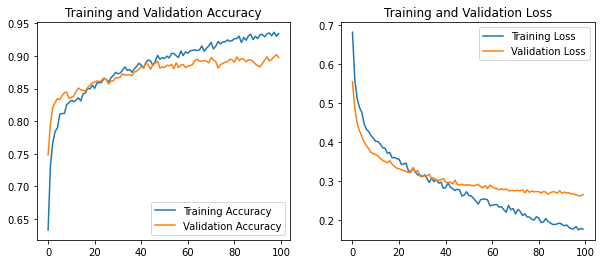

In [17]:
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

loss = H.history['loss']
val_loss = H.history['val_loss']

epochs=100
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [18]:
model.save("smoking_modelMN.h5")
print('Model Saved!')

C:\Users\shaha\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Model Saved!


In [23]:
from keras.models import load_model
Model = load_model("smoking_modelMN.h5")

In [19]:
baseModel.save("smoking_modelMN2.h5")
print('Model Saved!')

Model Saved!
